In [2]:
# Importing the libraries 
import pandas as pd 
import numpy as np 
from IPython.display import display

import matplotlib.pyplot as plt 
import re
import string

import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
#nltk.download('stopwords')
#nltk.download('vader_lexicon')


from collections import Counter

from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
import plotly.express as px

sns.set(style="darkgrid")

In [3]:
# reading data from csv file
df = pd.read_csv("twitterEndSars.csv")
df.head(5)

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,0,https://twitter.com/hurbhiaghelee/status/13852...,2021-04-22 18:28:26+00:00,This is the highest form of intimidation\nWhat...,1385299471123238912,hurbhiaghelee,['https://twitter.com/AmaiweLove/status/138519...,https://twitter.com/AmaiweLove/status/13851900...,['https://t.co/xxdTK0BmQB'],https://t.co/xxdTK0BmQB
1,1,https://twitter.com/AlukoJoseph5/status/138524...,2021-04-22 15:07:05+00:00,Why is it taking a life long time for @MBuhari...,1385248799770267650,AlukoJoseph5,[],NaN,[],NaN
2,2,https://twitter.com/omofuma_Elijah/status/1385...,2021-04-22 10:13:20+00:00,"Even Desmond Elliot is quite , ,,, what is tha...",1385174876428902400,omofuma_Elijah,['https://twitter.com/vhic_tore/status/1385141...,https://twitter.com/vhic_tore/status/138514152...,['https://t.co/RsVQ4N8LwM'],https://t.co/RsVQ4N8LwM
3,3,https://twitter.com/FelixOdohoedi/status/13851...,2021-04-22 09:48:04+00:00,When will CBN freeze the account of @DrIsaPant...,1385168517104869378,FelixOdohoedi,['https://twitter.com/Imudia_se2/status/138495...,https://twitter.com/Imudia_se2/status/13849543...,['https://t.co/r3vxrbkLdn'],https://t.co/r3vxrbkLdn
4,4,https://twitter.com/adekzee1/status/1385164392...,2021-04-22 09:31:40+00:00,@Obiejazzyup @YeleSowore @MBuhari @EndSars @mb...,1385164392447238145,adekzee1,[],NaN,[],NaN


In [7]:
#data shape
df.shape

(9737, 3)

In [8]:
# filtering needed columns
needed_columns=['username','date','content']
df=df[needed_columns]
df.head()

,username,date,content
0,hurbhiaghelee,2021-04-22 18:28:26+00:00,This is the highest form of intimidation\nWhat...
1,AlukoJoseph5,2021-04-22 15:07:05+00:00,Why is it taking a life long time for @MBuhari...
2,omofuma_Elijah,2021-04-22 10:13:20+00:00,"Even Desmond Elliot is quite , ,,, what is tha..."
3,FelixOdohoedi,2021-04-22 09:48:04+00:00,When will CBN freeze the account of @DrIsaPant...
4,adekzee1,2021-04-22 09:31:40+00:00,@Obiejazzyup @YeleSowore @MBuhari @EndSars @mb...


In [7]:
# categorising username
df.username=df.username.astype('category')
df.username=df.username.cat.codes
df.date=pd.to_datetime(df.date).dt.date # post_date

In [9]:
# display dataset for confirmation
df.head()

,username,date,content
0,hurbhiaghelee,2021-04-22 18:28:26+00:00,This is the highest form of intimidation\nWhat...
1,AlukoJoseph5,2021-04-22 15:07:05+00:00,Why is it taking a life long time for @MBuhari...
2,omofuma_Elijah,2021-04-22 10:13:20+00:00,"Even Desmond Elliot is quite , ,,, what is tha..."
3,FelixOdohoedi,2021-04-22 09:48:04+00:00,When will CBN freeze the account of @DrIsaPant...
4,adekzee1,2021-04-22 09:31:40+00:00,@Obiejazzyup @YeleSowore @MBuhari @EndSars @mb...


In [10]:
# collecting contents column as text
texts=df.content
texts

0       This is the highest form of intimidation\nWhat...
1       Why is it taking a life long time for @MBuhari...
2       Even Desmond Elliot is quite , ,,, what is tha...
3       When will CBN freeze the account of @DrIsaPant...
4       @Obiejazzyup @YeleSowore @MBuhari @EndSars @mb...
                              ...                        
9732    @YomiShogunle @PoliceNG_PCRRU @PoliceNG Will i...
9733    Will The Government\n@PoliceNG @PoliceNG_PCRRU...
9734    @EndSARS issues, ending SARS is not the issue ...
9735    U are handsome - suspect \nWear New shoe - sus...
9736    We can't really create the change only on Twit...
Name: content, Length: 9737, dtype: object

In [11]:
#removing urls from dataset
remove_url=lambda x:re.sub(r'http\S+','',str(x))
texts_lr=texts.apply(remove_url)
texts_lr

0       This is the highest form of intimidation\nWhat...
1       Why is it taking a life long time for @MBuhari...
2       Even Desmond Elliot is quite , ,,, what is tha...
3       When will CBN freeze the account of @DrIsaPant...
4       @Obiejazzyup @YeleSowore @MBuhari @EndSars @mb...
                              ...                        
9732    @YomiShogunle @PoliceNG_PCRRU @PoliceNG Will i...
9733    Will The Government\n@PoliceNG @PoliceNG_PCRRU...
9734    @EndSARS issues, ending SARS is not the issue ...
9735    U are handsome - suspect \nWear New shoe - sus...
9736    We can't really create the change only on Twit...
Name: content, Length: 9737, dtype: object

In [12]:
#changing case to lowercase
to_lower=lambda x: x.lower()
texts_lr_lc=texts_lr.apply(to_lower)
texts_lr_lc

0       this is the highest form of intimidation\nwhat...
1       why is it taking a life long time for @mbuhari...
2       even desmond elliot is quite , ,,, what is tha...
3       when will cbn freeze the account of @drisapant...
4       @obiejazzyup @yelesowore @mbuhari @endsars @mb...
                              ...                        
9732    @yomishogunle @policeng_pcrru @policeng will i...
9733    will the government\n@policeng @policeng_pcrru...
9734    @endsars issues, ending sars is not the issue ...
9735    u are handsome - suspect \nwear new shoe - sus...
9736    we can't really create the change only on twit...
Name: content, Length: 9737, dtype: object

In [16]:
#removing all punctuations
remove_puncs= lambda x:x.translate(str.maketrans('','',string.punctuation))
texts_lr_lc_np=texts_lr_lc.apply(remove_puncs)
texts_lr_lc_np

0       this is the highest form of intimidation\nwhat...
1       why is it taking a life long time for mbuhari ...
2       even desmond elliot is quite   what is that wo...
3       when will cbn freeze the account of drisapanta...
4       obiejazzyup yelesowore mbuhari endsars mbujari...
                              ...                        
9732    yomishogunle policengpcrru policeng will it be...
9733    will the government\npoliceng policengpcrru \n...
9734    endsars issues ending sars is not the issue bu...
9735    u are handsome  suspect \nwear new shoe  suspe...
9736    we cant really create the change only on twitt...
Name: content, Length: 9737, dtype: object

In [14]:
#removing stopwords
more_words=["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
stop_words=set(stopwords.words('english')) #nltk package
stop_words.update(more_words)

remove_words=lambda x: ' '.join([word for word in x.split() if word not in stop_words]) #.join is from package string
texts_lr_lc_np_ns=r=texts_lr_lc_np.apply(remove_words)
texts_lr_lc_np_ns

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\YANSILIYU/nltk_data'
    - 'c:\\Users\\YANSILIYU\\AppData\\Local\\Programs\\Python\\Python311\\nltk_data'
    - 'c:\\Users\\YANSILIYU\\AppData\\Local\\Programs\\Python\\Python311\\share\\nltk_data'
    - 'c:\\Users\\YANSILIYU\\AppData\\Local\\Programs\\Python\\Python311\\lib\\nltk_data'
    - 'C:\\Users\\YANSILIYU\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


#### let's create a big list of words out of all the tweets

In [17]:
words_list=[word for line in texts_lr_lc_np for word in line.split()]
words_list[:5]

['this', 'is', 'the', 'highest', 'form']

### Let's visualise the 50 most common words

,word,frq
0,endsars,10487
1,the,5256
2,to,3799
3,and,2651
4,is,2526


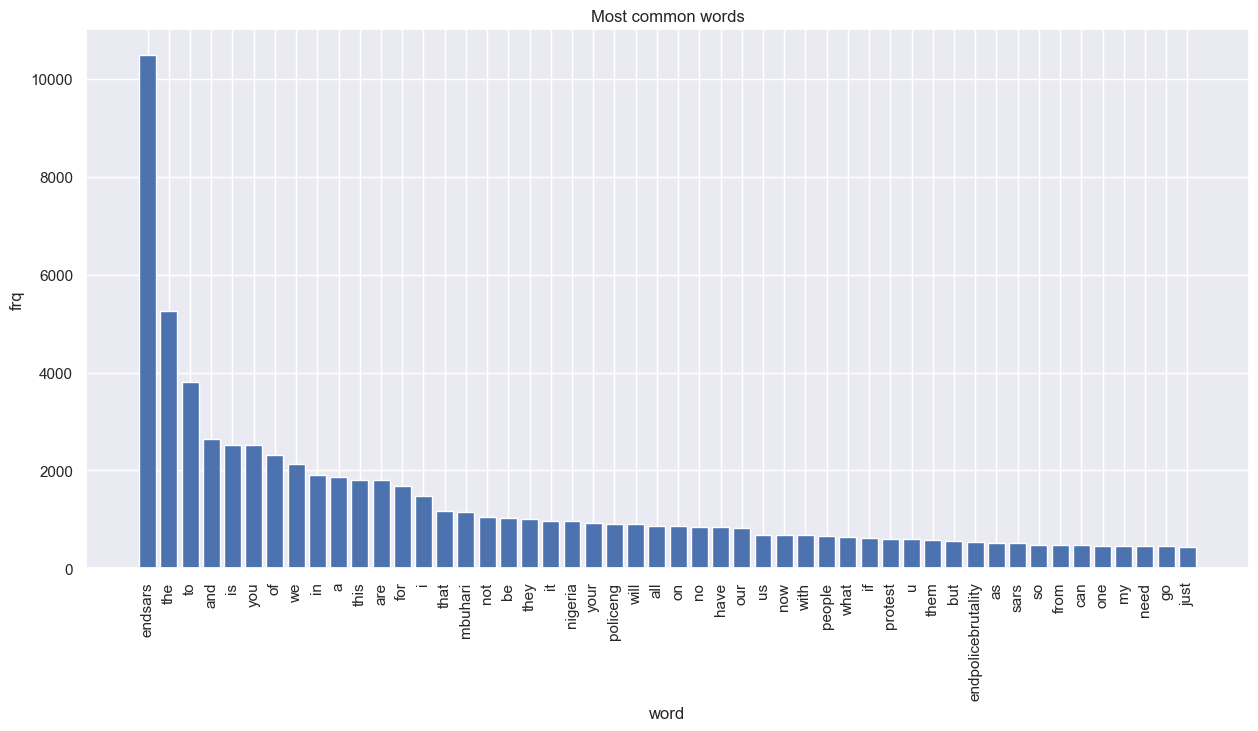

In [18]:
# creating dataframe and bar graph of most common 50 words with their frequency
word_counts=Counter(words_list).most_common(50)
word_df=pd.DataFrame(word_counts)
word_df.columns=['word','frq']
display(word_df.head(5))
# px=import plotly.express
#px.bar(word_df,x='word',y='frq',title='Most common words')

fig = plt.figure(figsize = (15, 7))
 
# creating the bar plot
plt.bar(word_df['word'],word_df['frq'])
plt.xticks(rotation=90)
plt.xlabel('word')
plt.ylabel('frq')
plt.title('Most common words')
plt.show()

In [20]:
#cleanded dataset to dataframe
display(df.head(5))
df.text=texts_lr_lc_np
display(df.head(5))

,username,date,content
0,hurbhiaghelee,2021-04-22 18:28:26+00:00,This is the highest form of intimidation\nWhat...
1,AlukoJoseph5,2021-04-22 15:07:05+00:00,Why is it taking a life long time for @MBuhari...
2,omofuma_Elijah,2021-04-22 10:13:20+00:00,"Even Desmond Elliot is quite , ,,, what is tha..."
3,FelixOdohoedi,2021-04-22 09:48:04+00:00,When will CBN freeze the account of @DrIsaPant...
4,adekzee1,2021-04-22 09:31:40+00:00,@Obiejazzyup @YeleSowore @MBuhari @EndSars @mb...


C:\Users\YANSILIYU\AppData\Local\Temp\ipykernel_11984\2201467745.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.text=texts_lr_lc_np


,username,date,content
0,hurbhiaghelee,2021-04-22 18:28:26+00:00,This is the highest form of intimidation\nWhat...
1,AlukoJoseph5,2021-04-22 15:07:05+00:00,Why is it taking a life long time for @MBuhari...
2,omofuma_Elijah,2021-04-22 10:13:20+00:00,"Even Desmond Elliot is quite , ,,, what is tha..."
3,FelixOdohoedi,2021-04-22 09:48:04+00:00,When will CBN freeze the account of @DrIsaPant...
4,adekzee1,2021-04-22 09:31:40+00:00,@Obiejazzyup @YeleSowore @MBuhari @EndSars @mb...


### Let's do some additional data cleaning


In [21]:
def clean_text(text):
    '''remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
df['content'] = df['content'].apply(lambda x: clean_text(x))
display(df)

,username,date,content
0,hurbhiaghelee,2021-04-22 18:28:26+00:00,This is the highest form of intimidationWhat o...
1,AlukoJoseph5,2021-04-22 15:07:05+00:00,Why is it taking a life long time for MBuhari ...
2,omofuma_Elijah,2021-04-22 10:13:20+00:00,Even Desmond Elliot is quite what is that wo...
3,FelixOdohoedi,2021-04-22 09:48:04+00:00,When will CBN freeze the account of DrIsaPanta...
4,adekzee1,2021-04-22 09:31:40+00:00,Obiejazzyup YeleSowore MBuhari EndSars mbujari...
...,...,...,...
9732,ReallyPetit,2017-12-03 23:05:56+00:00,YomiShogunle PoliceNGPCRRU PoliceNG Will it be...
9733,D_Ogiamien,2017-12-03 17:53:58+00:00,Will The GovernmentPoliceNG PoliceNGPCRRU Pret...
9734,kingsley_obiako,2017-12-03 11:47:36+00:00,EndSARS issues ending SARS is not the issue bu...
9735,Eze_Plano_Rich,2017-12-03 10:14:52+00:00,U are handsome suspect Wear New shoe suspect...


### Let's remove emoticons, symbols or flags by their codes

In [18]:
# function to remove emoticons, symbols or flags by their codes
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [19]:
# applying remove_emoji function on tweets
df['content']=df['content'].apply(lambda x: remove_emoji(x))
display(df)

,username,date,content
0,4928,2021-04-22,This is the highest form of intimidationWhat o...
1,382,2021-04-22,Why is it taking a life long time for MBuhari ...
2,5768,2021-04-22,Even Desmond Elliot is quite what is that wo...
3,1441,2021-04-22,When will CBN freeze the account of DrIsaPanta...
4,4045,2021-04-22,Obiejazzyup YeleSowore MBuhari EndSars mbujari...
...,...,...,...
9732,3220,2017-12-03,YomiShogunle PoliceNGPCRRU PoliceNG Will it be...
9733,997,2017-12-03,Will The GovernmentPoliceNG PoliceNGPCRRU Pret...
9734,5258,2017-12-03,EndSARS issues ending SARS is not the issue bu...
9735,1392,2017-12-03,U are handsome suspect Wear New shoe suspect...


## Sentiment Analysis


In [22]:
# getting polarity scores of tweets and storing them in variable 'sentiment_scores'
sid=SentimentIntensityAnalyzer()
ps=lambda x:sid.polarity_scores(x)
sentiment_scores=df.text.apply(ps)
sentiment_scores

LookupError: 
**********************************************************************
  Resource [93mvader_lexicon[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('vader_lexicon')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93msentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt[0m

  Searched in:
    - 'C:\\Users\\YANSILIYU/nltk_data'
    - 'c:\\Users\\YANSILIYU\\AppData\\Local\\Programs\\Python\\Python311\\nltk_data'
    - 'c:\\Users\\YANSILIYU\\AppData\\Local\\Programs\\Python\\Python311\\share\\nltk_data'
    - 'c:\\Users\\YANSILIYU\\AppData\\Local\\Programs\\Python\\Python311\\lib\\nltk_data'
    - 'C:\\Users\\YANSILIYU\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [21]:
# create the data frame of negative, neutral, positive and compound polarity scroes
sentiment_df=pd.DataFrame(data=list(sentiment_scores))
display(sentiment_df)

,neg,neu,pos,compound
0,0.236,0.660,0.104,-0.4215
1,0.305,0.495,0.201,-0.7003
2,0.152,0.758,0.090,-0.1779
3,0.177,0.731,0.092,-0.6369
4,0.184,0.559,0.257,0.3818
...,...,...,...,...
9732,0.090,0.667,0.242,0.5520
9733,0.149,0.851,0.000,-0.1027
9734,0.000,0.828,0.172,0.6124
9735,0.350,0.504,0.146,-0.6908


### Labeling the scores based on the compound polarity value

In [22]:
# it will label the tweets as neutral if its compound polarity is 0 and positive if its greater than 0 and negative if its less than 0
labelize=lambda x:'neutral' if x==0 else('positive' if x>0 else 'negative')
sentiment_df['label']=sentiment_df.compound.apply(labelize)
display(sentiment_df.head(10))

,neg,neu,pos,compound,label
0,0.236,0.660,0.104,-0.4215,negative
1,0.305,0.495,0.201,-0.7003,negative
2,0.152,0.758,0.090,-0.1779,negative
3,0.177,0.731,0.092,-0.6369,negative
4,0.184,0.559,0.257,0.3818,positive
5,0.269,0.493,0.238,-0.1779,negative
6,0.000,1.000,0.000,0.0000,neutral
7,0.407,0.543,0.050,-0.7845,negative
8,0.220,0.680,0.100,-0.4588,negative
9,0.000,1.000,0.000,0.0000,neutral


### let's join two dataframes

In [23]:
display(df.head(5))
data=df.join(sentiment_df.label)
sentiment_df = df.join(sentiment_df)
display(data.head(5))

,username,date,content
0,4928,2021-04-22,This is the highest form of intimidationWhat o...
1,382,2021-04-22,Why is it taking a life long time for MBuhari ...
2,5768,2021-04-22,Even Desmond Elliot is quite what is that wo...
3,1441,2021-04-22,When will CBN freeze the account of DrIsaPanta...
4,4045,2021-04-22,Obiejazzyup YeleSowore MBuhari EndSars mbujari...


,username,date,content,label
0,4928,2021-04-22,This is the highest form of intimidationWhat o...,negative
1,382,2021-04-22,Why is it taking a life long time for MBuhari ...,negative
2,5768,2021-04-22,Even Desmond Elliot is quite what is that wo...,negative
3,1441,2021-04-22,When will CBN freeze the account of DrIsaPanta...,negative
4,4045,2021-04-22,Obiejazzyup YeleSowore MBuhari EndSars mbujari...,positive


### Plotting the sentiment score counts

In [24]:
counts_df=data.label.value_counts().reset_index()
display(counts_df)

,index,label
0,neutral,3860
1,negative,3086
2,positive,2791


<AxesSubplot:xlabel='index', ylabel='label'>

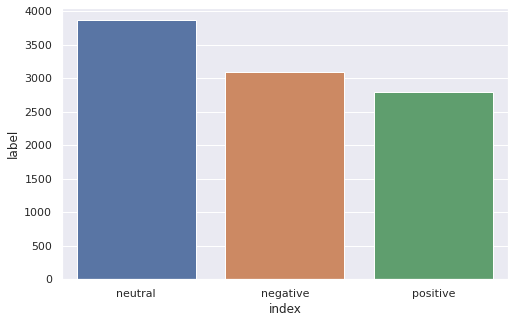

In [25]:
plt.figure(figsize=(8,5)) 
sns.barplot(x='index',y='label',data=counts_df)

### group number of counts by
#### date
#### positive,neutral,negative

In [26]:
data_agg=data[['username','date','label']]
display(data_agg.head(5))

,username,date,label
0,4928,2021-04-22,negative
1,382,2021-04-22,negative
2,5768,2021-04-22,negative
3,1441,2021-04-22,negative
4,4045,2021-04-22,positive


In [27]:
data_agg=data_agg.groupby(['date','label'])
display(data_agg.head(5))

,username,date,label
0,4928,2021-04-22,negative
1,382,2021-04-22,negative
2,5768,2021-04-22,negative
3,1441,2021-04-22,negative
4,4045,2021-04-22,positive
...,...,...,...
9732,3220,2017-12-03,positive
9733,997,2017-12-03,negative
9734,5258,2017-12-03,positive
9735,1392,2017-12-03,negative


In [28]:
data_agg=data_agg.count()
display(data_agg.head(5))

username
date       label             
2017-12-03 negative         3
           positive         2
2017-12-04 negative         7
           neutral          4
           positive         6

In [29]:
data_agg=data_agg.reset_index()
display(data_agg.head(5))

,date,label,username
0,2017-12-03,negative,3
1,2017-12-03,positive,2
2,2017-12-04,negative,7
3,2017-12-04,neutral,4
4,2017-12-04,positive,6


### actually the 'username' is the count of users, so need to change the column name

In [30]:
data_agg.columns=['date','label','counts']
display(data_agg.head())

,date,label,counts
0,2017-12-03,negative,3
1,2017-12-03,positive,2
2,2017-12-04,negative,7
3,2017-12-04,neutral,4
4,2017-12-04,positive,6


In [31]:
neg = data_agg[data_agg['label']=='negative']
pos = data_agg[data_agg['label']=='positive']
neu = data_agg[data_agg['label']=='neutral']

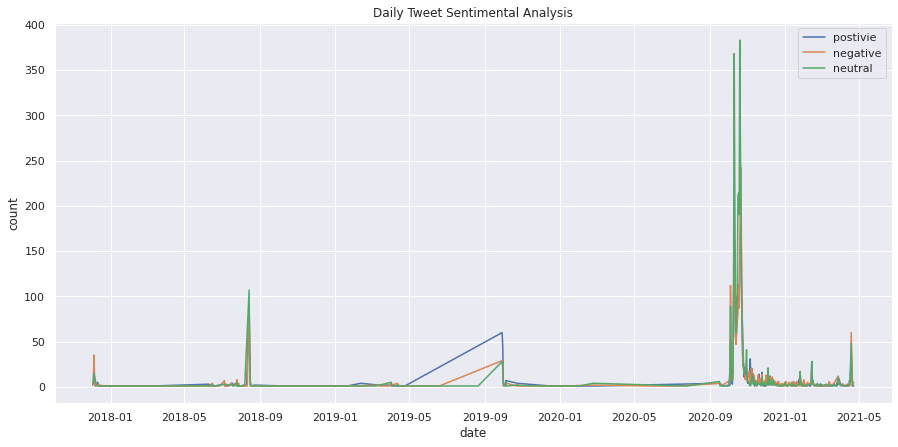

In [32]:
# px.line(data_agg,x='date',y='counts',color='label',title='Daily Tweet Sentimental Analysis')
fig = plt.figure(figsize = (15, 7))
plt.plot(pos['date'],pos['counts'], label='postivie')
plt.plot(neg['date'],neg['counts'], label='negative')
plt.plot(neu['date'],neu['counts'], label='neutral')
 
# Add labels and title
plt.title("Daily Tweet Sentimental Analysis")
plt.xlabel("date")
plt.ylabel("count")
plt.legend()
plt.show()

In [33]:
df['content']=df['content'].apply(lambda x: remove_emoji(x))
display(df)

,username,date,content
0,4928,2021-04-22,This is the highest form of intimidationWhat o...
1,382,2021-04-22,Why is it taking a life long time for MBuhari ...
2,5768,2021-04-22,Even Desmond Elliot is quite what is that wo...
3,1441,2021-04-22,When will CBN freeze the account of DrIsaPanta...
4,4045,2021-04-22,Obiejazzyup YeleSowore MBuhari EndSars mbujari...
...,...,...,...
9732,3220,2017-12-03,YomiShogunle PoliceNGPCRRU PoliceNG Will it be...
9733,997,2017-12-03,Will The GovernmentPoliceNG PoliceNGPCRRU Pret...
9734,5258,2017-12-03,EndSARS issues ending SARS is not the issue bu...
9735,1392,2017-12-03,U are handsome suspect Wear New shoe suspect...


### Generate wordcloud for this period

In [34]:
from wordcloud import WordCloud

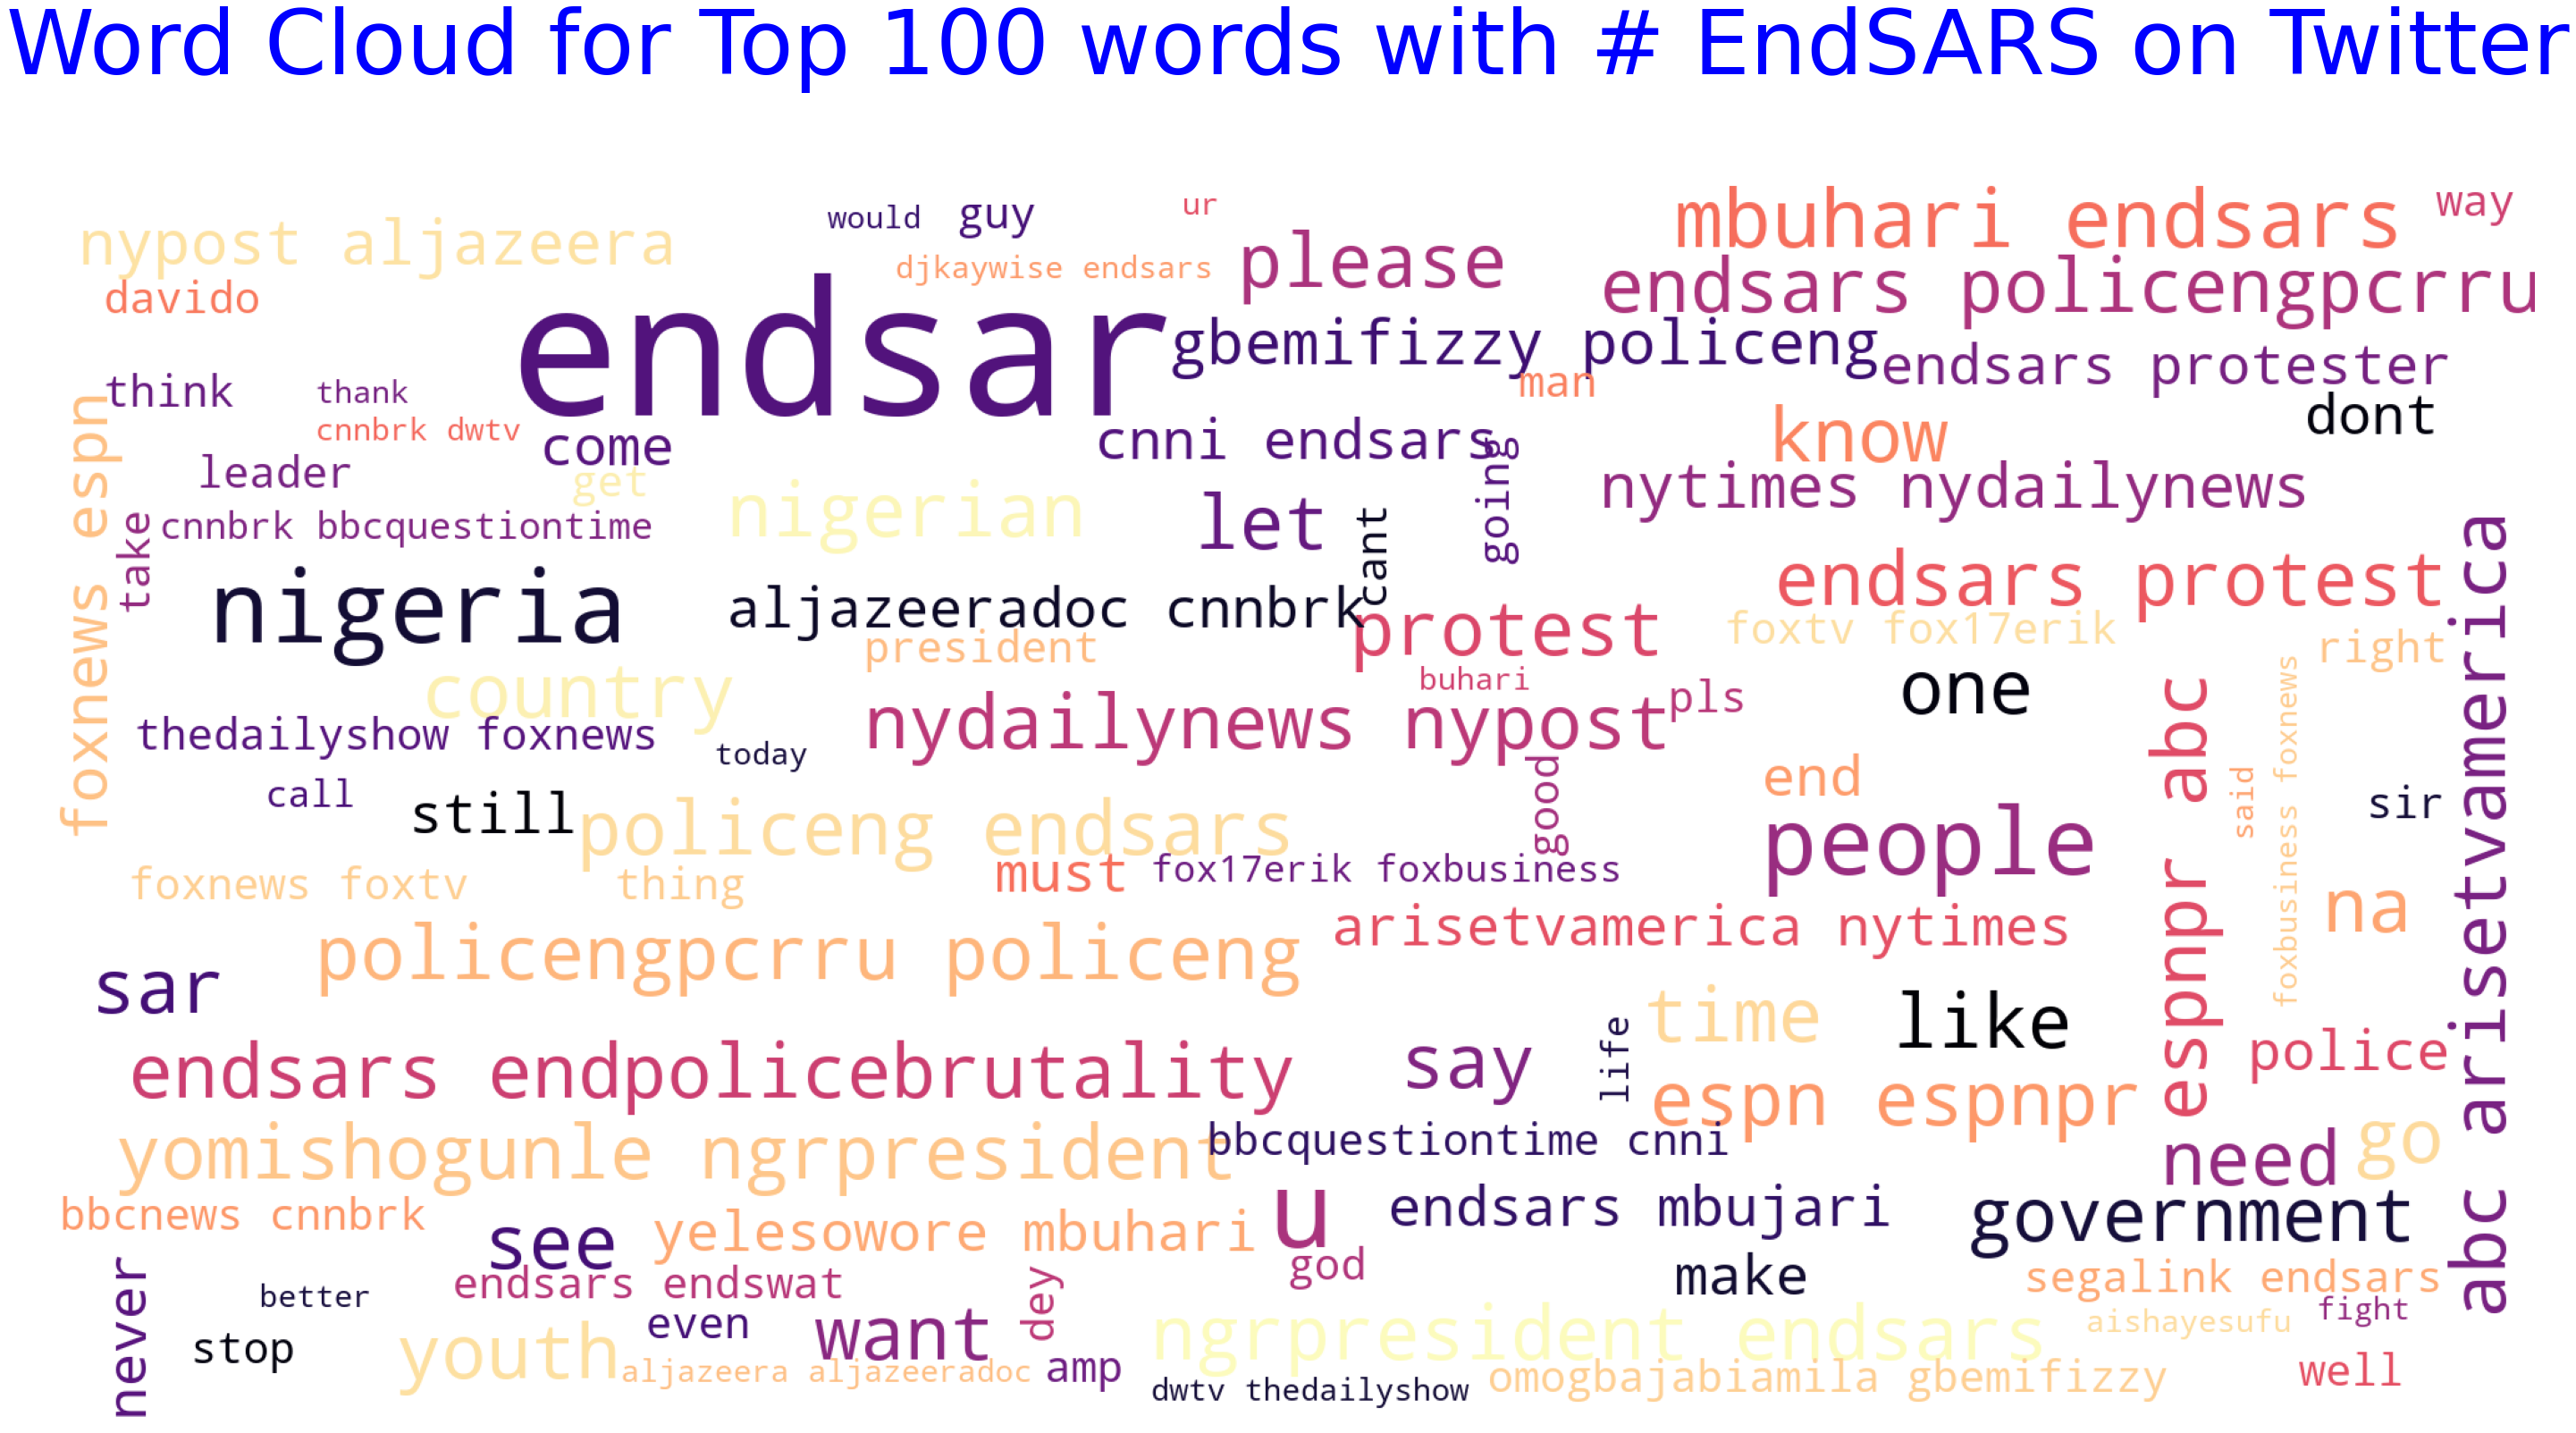

In [35]:
cut_text = " ".join(df.text)
max_words=100
word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(stop_words),
                    max_words=max_words,
                    max_font_size=30,
                    scale=5,
    colormap='magma',
                    random_state=1).generate(cut_text)
fig = plt.figure(1, figsize=(50,50))
plt.axis('off')
plt.title('Word Cloud for Top '+str(max_words)+' words with # EndSARS on Twitter\n', fontsize=100,color='blue')
fig.subplots_adjust(top=2.3)
plt.imshow(word_cloud)
plt.show()

## Let's zoom into October 2020 and 20th October 2020 and re-run the same analysis for this specific month and day. This is when the protests and shootings happened.

#### let's create a big list of words out of all the tweets

In [36]:
df['date'] = pd.to_datetime(df['date'])
df['cleaned'] = texts_lr_lc_np_ns

In [37]:
df_oct = df[(df['date']>='2020-10-01') & (df['date']<='2020-10-31')].reset_index(drop=True)
df_oct_20 = df[df['date']>='2020-10-20'].reset_index(drop=True)

texts_lr_lc_np_ns_oct = df_oct['cleaned']
texts_lr_lc_np_ns_oct_20 = df_oct_20['cleaned']

In [38]:
words_list_oct=[word for line in texts_lr_lc_np_ns_oct for word in line.split()]
print('Oct month',words_list[:5])

words_list_oct_20=[word for line in texts_lr_lc_np_ns_oct_20 for word in line.split()]
print('20th Oct',words_list[:5])

Oct month ['highest', 'form', 'intimidation', 'offence', 'commit']
20th Oct ['highest', 'form', 'intimidation', 'offence', 'commit']


,word,frq
0,endsars,7572
1,nigeria,710
2,mbuhari,653
3,endpolicebrutality,519
4,us,486


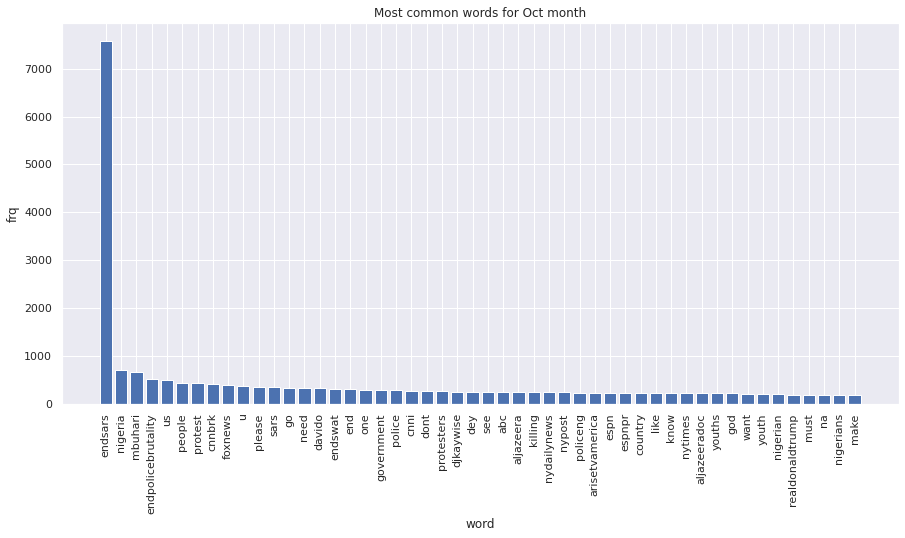

,word,frq
0,endsars,4040
1,mbuhari,700
2,nigeria,514
3,us,312
4,protesters,309


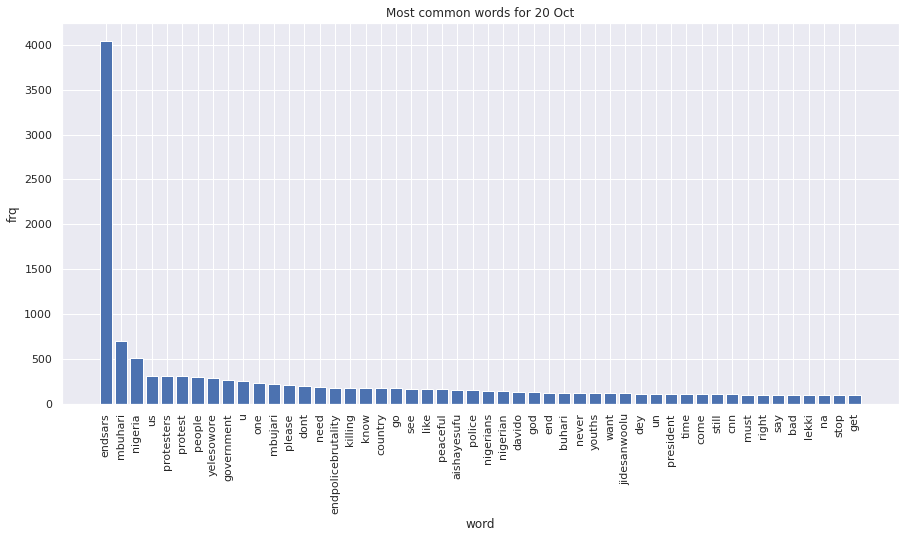

In [39]:
# creating dataframe and bar graph of most common 50 words with their frequency
word_counts=Counter(words_list_oct).most_common(50)
word_df=pd.DataFrame(word_counts)
word_df.columns=['word','frq']
display(word_df.head(5))
# px=import plotly.express
#display(px.bar(word_df,x='word',y='frq',title='Most common words for Oct month'))
fig = plt.figure(figsize = (15, 7))
 
# creating the bar plot
plt.bar(word_df['word'],word_df['frq'])
plt.xticks(rotation=90)
plt.xlabel('word')
plt.ylabel('frq')
plt.title('Most common words for Oct month')
plt.show()

word_counts=Counter(words_list_oct_20).most_common(50)
word_df=pd.DataFrame(word_counts)
word_df.columns=['word','frq']
display(word_df.head(5))
# px=import plotly.express
# display(px.bar(word_df,x='word',y='frq',title='Most common words for 20 Oct'))
fig = plt.figure(figsize = (15, 7))
 
# creating the bar plot
plt.bar(word_df['word'],word_df['frq'])
plt.xticks(rotation=90)
plt.xlabel('word')
plt.ylabel('frq')
plt.title('Most common words for 20 Oct')
plt.show()

#### put the Cleaned text in main dataframe

In [40]:
df_oct['content'] = df_oct['cleaned']
df_oct_20['content'] = df_oct_20['cleaned']

In [41]:
df_oct.drop('cleaned',axis=1,inplace=True)
df_oct_20.drop('cleaned',axis=1,inplace=True)

### Some addtional cleaning

In [42]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
df_oct['content'] = df_oct['content'].apply(lambda x: clean_text(x))
df_oct_20['content'] = df_oct_20['content'].apply(lambda x: clean_text(x))
display(df_oct)
display(df_oct_20)

,username,date,content
0,4700,2020-10-31,na revolution want month endsars
1,3750,2020-10-31,rivers state fire endsarsendbadgovernment
2,2920,2020-10-31,adekunlegold useless governors president say s...
3,1907,2020-10-31,ipobcommunity nnamdifans amnestynigeria usinni...
4,1907,2020-10-31,aloyejimakor ipob bearing burden offence commi...
...,...,...,...
6971,5099,2020-10-03,fireboydml endsars
6972,336,2020-10-03,tomorrow governor okowa say working endsars wo...
6973,1480,2020-10-03,mbuhari baba endsars
6974,827,2020-10-03,life promised us enjoy seeing people die alrea...


,username,date,content
0,4928,2021-04-22,highest form intimidation offence commit give ...
1,382,2021-04-22,taking life long time mbuhari sack drisapantam...
2,5768,2021-04-22,even desmond elliot quite womans name look lik...
3,1441,2021-04-22,cbn freeze account drisapantami cbn quick free...
4,4045,2021-04-22,obiejazzyup yelesowore mbuhari endsars mbujari...
...,...,...,...
4028,1287,2020-10-20,youngpatriots harryben endsars
4029,2302,2020-10-20,endsars
4030,884,2020-10-20,maybe conscripted prosars anti endsars gheng i...
4031,6484,2020-10-20,uchejombo endsars focus endsars


In [43]:
# function to remove emoticons, symbols or flags by their codes
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [44]:
# applying remove_emoji function on tweets
df_oct['content']=df_oct['content'].apply(lambda x: remove_emoji(x))
df_oct_20['content']=df_oct_20['content'].apply(lambda x: remove_emoji(x))
display(df_oct)
display(df_oct_20)

,username,date,content
0,4700,2020-10-31,na revolution want month endsars
1,3750,2020-10-31,rivers state fire endsarsendbadgovernment
2,2920,2020-10-31,adekunlegold useless governors president say s...
3,1907,2020-10-31,ipobcommunity nnamdifans amnestynigeria usinni...
4,1907,2020-10-31,aloyejimakor ipob bearing burden offence commi...
...,...,...,...
6971,5099,2020-10-03,fireboydml endsars
6972,336,2020-10-03,tomorrow governor okowa say working endsars wo...
6973,1480,2020-10-03,mbuhari baba endsars
6974,827,2020-10-03,life promised us enjoy seeing people die alrea...


,username,date,content
0,4928,2021-04-22,highest form intimidation offence commit give ...
1,382,2021-04-22,taking life long time mbuhari sack drisapantam...
2,5768,2021-04-22,even desmond elliot quite womans name look lik...
3,1441,2021-04-22,cbn freeze account drisapantami cbn quick free...
4,4045,2021-04-22,obiejazzyup yelesowore mbuhari endsars mbujari...
...,...,...,...
4028,1287,2020-10-20,youngpatriots harryben endsars
4029,2302,2020-10-20,endsars
4030,884,2020-10-20,maybe conscripted prosars anti endsars gheng i...
4031,6484,2020-10-20,uchejombo endsars focus endsars


## Sentiment Analysis for October 2020 and 20th October 2020

In [45]:
# getting polarity scores of tweets and storing them in variable 'sentiment_scores'
sid=SentimentIntensityAnalyzer()
ps=lambda x:sid.polarity_scores(x)
sentiment_scores_oct=df_oct.content.apply(ps)
sentiment_scores_oct_20=df_oct_20.content.apply(ps)
display(sentiment_scores_oct)
display(sentiment_scores_oct_20)

0       {'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'comp...
1       {'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'comp...
2       {'neg': 0.237, 'neu': 0.763, 'pos': 0.0, 'comp...
3       {'neg': 0.306, 'neu': 0.694, 'pos': 0.0, 'comp...
4       {'neg': 0.28, 'neu': 0.495, 'pos': 0.225, 'com...
                              ...                        
6971    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6972    {'neg': 0.307, 'neu': 0.693, 'pos': 0.0, 'comp...
6973    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6974    {'neg': 0.181, 'neu': 0.556, 'pos': 0.264, 'co...
6975    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: content, Length: 6976, dtype: object

0       {'neg': 0.248, 'neu': 0.644, 'pos': 0.109, 'co...
1       {'neg': 0.305, 'neu': 0.495, 'pos': 0.201, 'co...
2       {'neg': 0.152, 'neu': 0.758, 'pos': 0.09, 'com...
3       {'neg': 0.177, 'neu': 0.731, 'pos': 0.092, 'co...
4       {'neg': 0.184, 'neu': 0.559, 'pos': 0.257, 'co...
                              ...                        
4028    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4029    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4030    {'neg': 0.621, 'neu': 0.379, 'pos': 0.0, 'comp...
4031    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4032    {'neg': 0.16, 'neu': 0.588, 'pos': 0.252, 'com...
Name: content, Length: 4033, dtype: object

In [46]:
# create the data frame of negative, neutral, positive and compound polarity scroes
sentiment_df_oct=pd.DataFrame(data=list(sentiment_scores_oct))
sentiment_df_oct_20=pd.DataFrame(data=list(sentiment_scores_oct_20))
display(sentiment_df_oct)
display(sentiment_df_oct_20)

,neg,neu,pos,compound
0,0.000,0.755,0.245,0.0772
1,0.444,0.556,0.000,-0.3400
2,0.237,0.763,0.000,-0.4215
3,0.306,0.694,0.000,-0.6597
4,0.280,0.495,0.225,-0.2500
...,...,...,...,...
6971,0.000,1.000,0.000,0.0000
6972,0.307,0.693,0.000,-0.4767
6973,0.000,1.000,0.000,0.0000
6974,0.181,0.556,0.264,0.2023


,neg,neu,pos,compound
0,0.248,0.644,0.109,-0.4215
1,0.305,0.495,0.201,-0.7003
2,0.152,0.758,0.090,-0.1779
3,0.177,0.731,0.092,-0.6369
4,0.184,0.559,0.257,0.3818
...,...,...,...,...
4028,0.000,1.000,0.000,0.0000
4029,0.000,1.000,0.000,0.0000
4030,0.621,0.379,0.000,-0.8020
4031,0.000,1.000,0.000,0.0000


### Labeling the scores based on the compound polarity value

In [47]:
# it will label the tweets as neutral if its compound polarity is 0 and positive if its greater than 0 and negative if its less than 0
labelize=lambda x:'neutral' if x==0 else('positive' if x>0 else 'negative')
sentiment_df_oct['label']=sentiment_df_oct.compound.apply(labelize)
sentiment_df_oct_20['label']=sentiment_df_oct_20.compound.apply(labelize)
display(sentiment_df_oct.head(10))
display(sentiment_df_oct_20.head(10))

,neg,neu,pos,compound,label
0,0.000,0.755,0.245,0.0772,positive
1,0.444,0.556,0.000,-0.3400,negative
2,0.237,0.763,0.000,-0.4215,negative
3,0.306,0.694,0.000,-0.6597,negative
4,0.280,0.495,0.225,-0.2500,negative
5,0.000,1.000,0.000,0.0000,neutral
6,0.540,0.460,0.000,-0.6908,negative
7,0.000,0.723,0.277,0.3182,positive
8,0.000,1.000,0.000,0.0000,neutral
9,0.000,1.000,0.000,0.0000,neutral


,neg,neu,pos,compound,label
0,0.248,0.644,0.109,-0.4215,negative
1,0.305,0.495,0.201,-0.7003,negative
2,0.152,0.758,0.090,-0.1779,negative
3,0.177,0.731,0.092,-0.6369,negative
4,0.184,0.559,0.257,0.3818,positive
5,0.269,0.493,0.238,-0.1779,negative
6,0.000,1.000,0.000,0.0000,neutral
7,0.407,0.543,0.050,-0.7845,negative
8,0.220,0.680,0.100,-0.4588,negative
9,0.000,1.000,0.000,0.0000,neutral


### let's join two dataframes

In [48]:
display(df_oct.head(5))
data_oct=df.join(sentiment_df_oct.label)
display(data_oct.head(5))
display(df_oct_20.head(5))
data_oct_20=df.join(sentiment_df_oct_20.label)
display(data_oct_20.head(5))

,username,date,content
0,4700,2020-10-31,na revolution want month endsars
1,3750,2020-10-31,rivers state fire endsarsendbadgovernment
2,2920,2020-10-31,adekunlegold useless governors president say s...
3,1907,2020-10-31,ipobcommunity nnamdifans amnestynigeria usinni...
4,1907,2020-10-31,aloyejimakor ipob bearing burden offence commi...


,username,date,content,cleaned,label
0,4928,2021-04-22,This is the highest form of intimidationWhat o...,highest form intimidation offence commit give ...,positive
1,382,2021-04-22,Why is it taking a life long time for MBuhari ...,taking life long time mbuhari sack drisapantam...,negative
2,5768,2021-04-22,Even Desmond Elliot is quite what is that wo...,even desmond elliot quite womans name look lik...,negative
3,1441,2021-04-22,When will CBN freeze the account of DrIsaPanta...,cbn freeze account drisapantami cbn quick free...,negative
4,4045,2021-04-22,Obiejazzyup YeleSowore MBuhari EndSars mbujari...,obiejazzyup yelesowore mbuhari endsars mbujari...,negative


,username,date,content
0,4928,2021-04-22,highest form intimidation offence commit give ...
1,382,2021-04-22,taking life long time mbuhari sack drisapantam...
2,5768,2021-04-22,even desmond elliot quite womans name look lik...
3,1441,2021-04-22,cbn freeze account drisapantami cbn quick free...
4,4045,2021-04-22,obiejazzyup yelesowore mbuhari endsars mbujari...


,username,date,content,cleaned,label
0,4928,2021-04-22,This is the highest form of intimidationWhat o...,highest form intimidation offence commit give ...,negative
1,382,2021-04-22,Why is it taking a life long time for MBuhari ...,taking life long time mbuhari sack drisapantam...,negative
2,5768,2021-04-22,Even Desmond Elliot is quite what is that wo...,even desmond elliot quite womans name look lik...,negative
3,1441,2021-04-22,When will CBN freeze the account of DrIsaPanta...,cbn freeze account drisapantami cbn quick free...,negative
4,4045,2021-04-22,Obiejazzyup YeleSowore MBuhari EndSars mbujari...,obiejazzyup yelesowore mbuhari endsars mbujari...,positive


### Plotting the sentiment score counts

In [49]:
counts_df_oct=data_oct.label.value_counts().reset_index()
counts_df_oct_20=data_oct_20.label.value_counts().reset_index()
display(counts_df_oct)
display(counts_df_oct_20)

,index,label
0,neutral,3098
1,negative,2012
2,positive,1866


,index,label
0,negative,1501
1,neutral,1326
2,positive,1206


<AxesSubplot:xlabel='index', ylabel='label'>

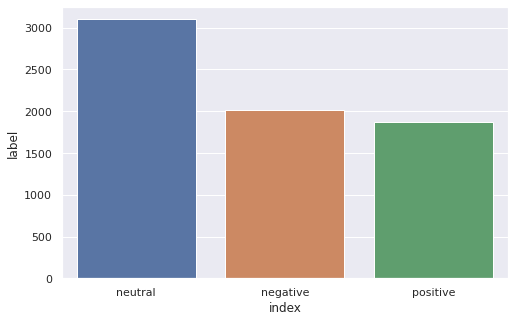

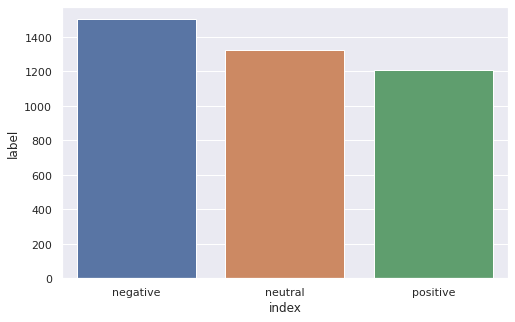

In [50]:
plt.figure(figsize=(8,5)) 
sns.barplot(x='index',y='label',data=counts_df_oct)

plt.figure(figsize=(8,5)) 
sns.barplot(x='index',y='label',data=counts_df_oct_20)

### group number of counts by
#### date
#### positive,neutral,negative

In [51]:
data_agg_oct=data_oct[['username','date','label']]
data_agg_oct_20=data_oct_20[['username','date','label']]
display(data_agg_oct.head(5))
display(data_agg_oct_20.head(5))

,username,date,label
0,4928,2021-04-22,positive
1,382,2021-04-22,negative
2,5768,2021-04-22,negative
3,1441,2021-04-22,negative
4,4045,2021-04-22,negative


,username,date,label
0,4928,2021-04-22,negative
1,382,2021-04-22,negative
2,5768,2021-04-22,negative
3,1441,2021-04-22,negative
4,4045,2021-04-22,positive


In [52]:
data_agg_oct=data_agg_oct.groupby(['date','label'])
data_agg_oct_20=data_agg_oct_20.groupby(['date','label'])
display(data_agg_oct.head(5))
display(data_agg_oct_20.head(5))

,username,date,label
0,4928,2021-04-22,positive
1,382,2021-04-22,negative
2,5768,2021-04-22,negative
3,1441,2021-04-22,negative
4,4045,2021-04-22,negative
...,...,...,...
6976,2702,2020-10-11,NaN
6977,1630,2020-10-11,NaN
6978,5491,2020-10-11,NaN
6979,5620,2020-10-11,NaN


,username,date,label
0,4928,2021-04-22,negative
1,382,2021-04-22,negative
2,5768,2021-04-22,negative
3,1441,2021-04-22,negative
4,4045,2021-04-22,positive
...,...,...,...
4033,1423,2020-10-19,NaN
4034,3276,2020-10-19,NaN
4035,5432,2020-10-19,NaN
4036,2161,2020-10-19,NaN


In [53]:
data_agg_oct=data_agg_oct.count()
data_agg_oct_20=data_agg_oct_20.count()
display(data_agg_oct.head(5))
display(data_agg_oct_20.head(5))

username
date       label             
2020-10-11 negative        90
           neutral         83
           positive        39
2020-10-12 negative        91
           neutral         95

username
date       label             
2020-10-20 negative       242
           neutral        278
           positive       172
2020-10-21 negative       242
           neutral        197

In [54]:
data_agg_oct=data_agg_oct.reset_index()
data_agg_oct_20=data_agg_oct_20.reset_index()
display(data_agg_oct.head(5))
display(data_agg_oct_20.head(5))

,date,label,username
0,2020-10-11,negative,90
1,2020-10-11,neutral,83
2,2020-10-11,positive,39
3,2020-10-12,negative,91
4,2020-10-12,neutral,95


,date,label,username
0,2020-10-20,negative,242
1,2020-10-20,neutral,278
2,2020-10-20,positive,172
3,2020-10-21,negative,242
4,2020-10-21,neutral,197


### actually the 'username' is the count of users, so need to change the column name

In [55]:
data_agg_oct.columns=['date','label','counts']
data_agg_oct_20.columns=['date','label','counts']
display(data_agg_oct.head())
display(data_agg_oct_20.head())

,date,label,counts
0,2020-10-11,negative,90
1,2020-10-11,neutral,83
2,2020-10-11,positive,39
3,2020-10-12,negative,91
4,2020-10-12,neutral,95


,date,label,counts
0,2020-10-20,negative,242
1,2020-10-20,neutral,278
2,2020-10-20,positive,172
3,2020-10-21,negative,242
4,2020-10-21,neutral,197


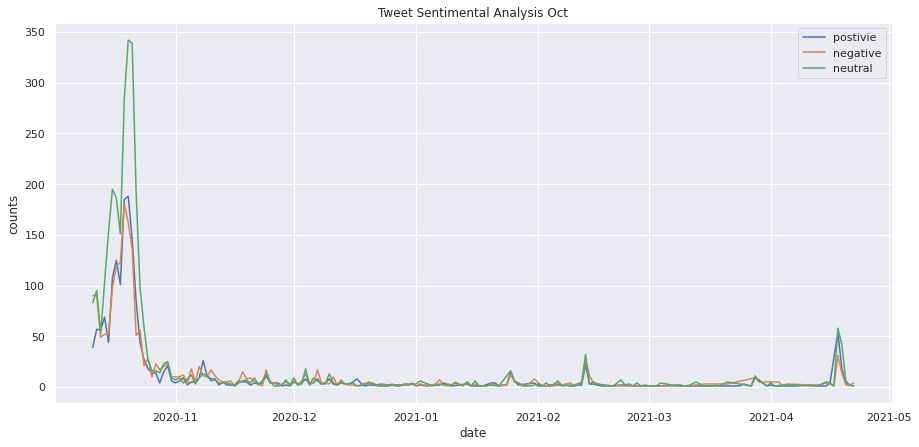

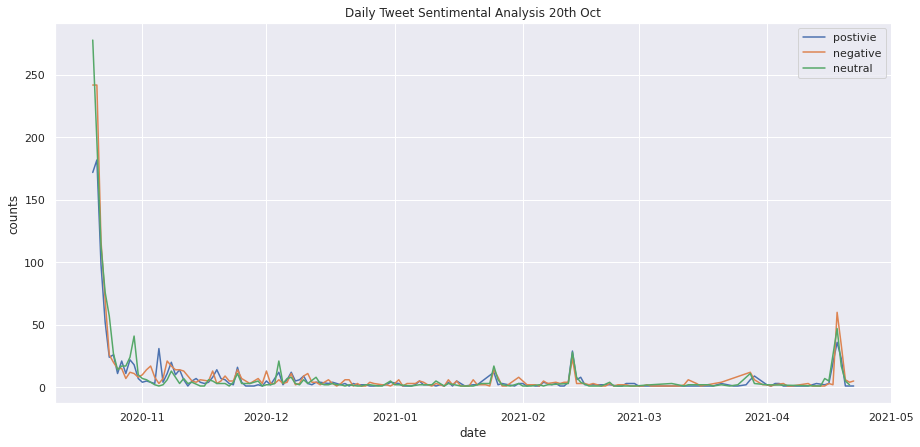

In [56]:
neg = data_agg_oct[data_agg_oct['label']=='negative']
pos = data_agg_oct[data_agg_oct['label']=='positive']
neu = data_agg_oct[data_agg_oct['label']=='neutral']

# display(px.line(data_agg_oct,x='date',y='counts',color='label',title='Tweet Sentimental Analysis Oct'))
fig = plt.figure(figsize = (15, 7))
plt.plot(pos['date'],pos['counts'], label='postivie')
plt.plot(neg['date'],neg['counts'], label='negative')
plt.plot(neu['date'],neu['counts'], label='neutral')
 
# Add labels and title
plt.title("Tweet Sentimental Analysis Oct")
plt.xlabel("date")
plt.ylabel("counts")
plt.legend()
plt.show()

neg = data_agg_oct_20[data_agg_oct_20['label']=='negative']
pos = data_agg_oct_20[data_agg_oct_20['label']=='positive']
neu = data_agg_oct_20[data_agg_oct_20['label']=='neutral']

# display(px.line(data_agg_oct_20,x='date',y='counts',color='label',title='Daily Tweet Sentimental Analysis 20th Oct'))
fig = plt.figure(figsize = (15, 7))
plt.plot(pos['date'],pos['counts'], label='postivie')
plt.plot(neg['date'],neg['counts'], label='negative')
plt.plot(neu['date'],neu['counts'], label='neutral')
 
# Add labels and title
plt.title("Daily Tweet Sentimental Analysis 20th Oct")
plt.xlabel("date")
plt.ylabel("counts")
plt.legend()
plt.show()

In [57]:
df['content']=df['content'].apply(lambda x: remove_emoji(x))
display(df)

,username,date,content,cleaned
0,4928,2021-04-22,This is the highest form of intimidationWhat o...,highest form intimidation offence commit give ...
1,382,2021-04-22,Why is it taking a life long time for MBuhari ...,taking life long time mbuhari sack drisapantam...
2,5768,2021-04-22,Even Desmond Elliot is quite what is that wo...,even desmond elliot quite womans name look lik...
3,1441,2021-04-22,When will CBN freeze the account of DrIsaPanta...,cbn freeze account drisapantami cbn quick free...
4,4045,2021-04-22,Obiejazzyup YeleSowore MBuhari EndSars mbujari...,obiejazzyup yelesowore mbuhari endsars mbujari...
...,...,...,...,...
9732,3220,2017-12-03,YomiShogunle PoliceNGPCRRU PoliceNG Will it be...,yomishogunle policengpcrru policeng much apolo...
9733,997,2017-12-03,Will The GovernmentPoliceNG PoliceNGPCRRU Pret...,government policeng policengpcrru pretend seei...
9734,5258,2017-12-03,EndSARS issues ending SARS is not the issue bu...,endsars issues ending sars issue reorientation...
9735,1392,2017-12-03,U are handsome suspect Wear New shoe suspect...,u handsome suspect wear new shoe suspect holdi...


### Generating wordcloud for the specific period

In [58]:
from wordcloud import WordCloud

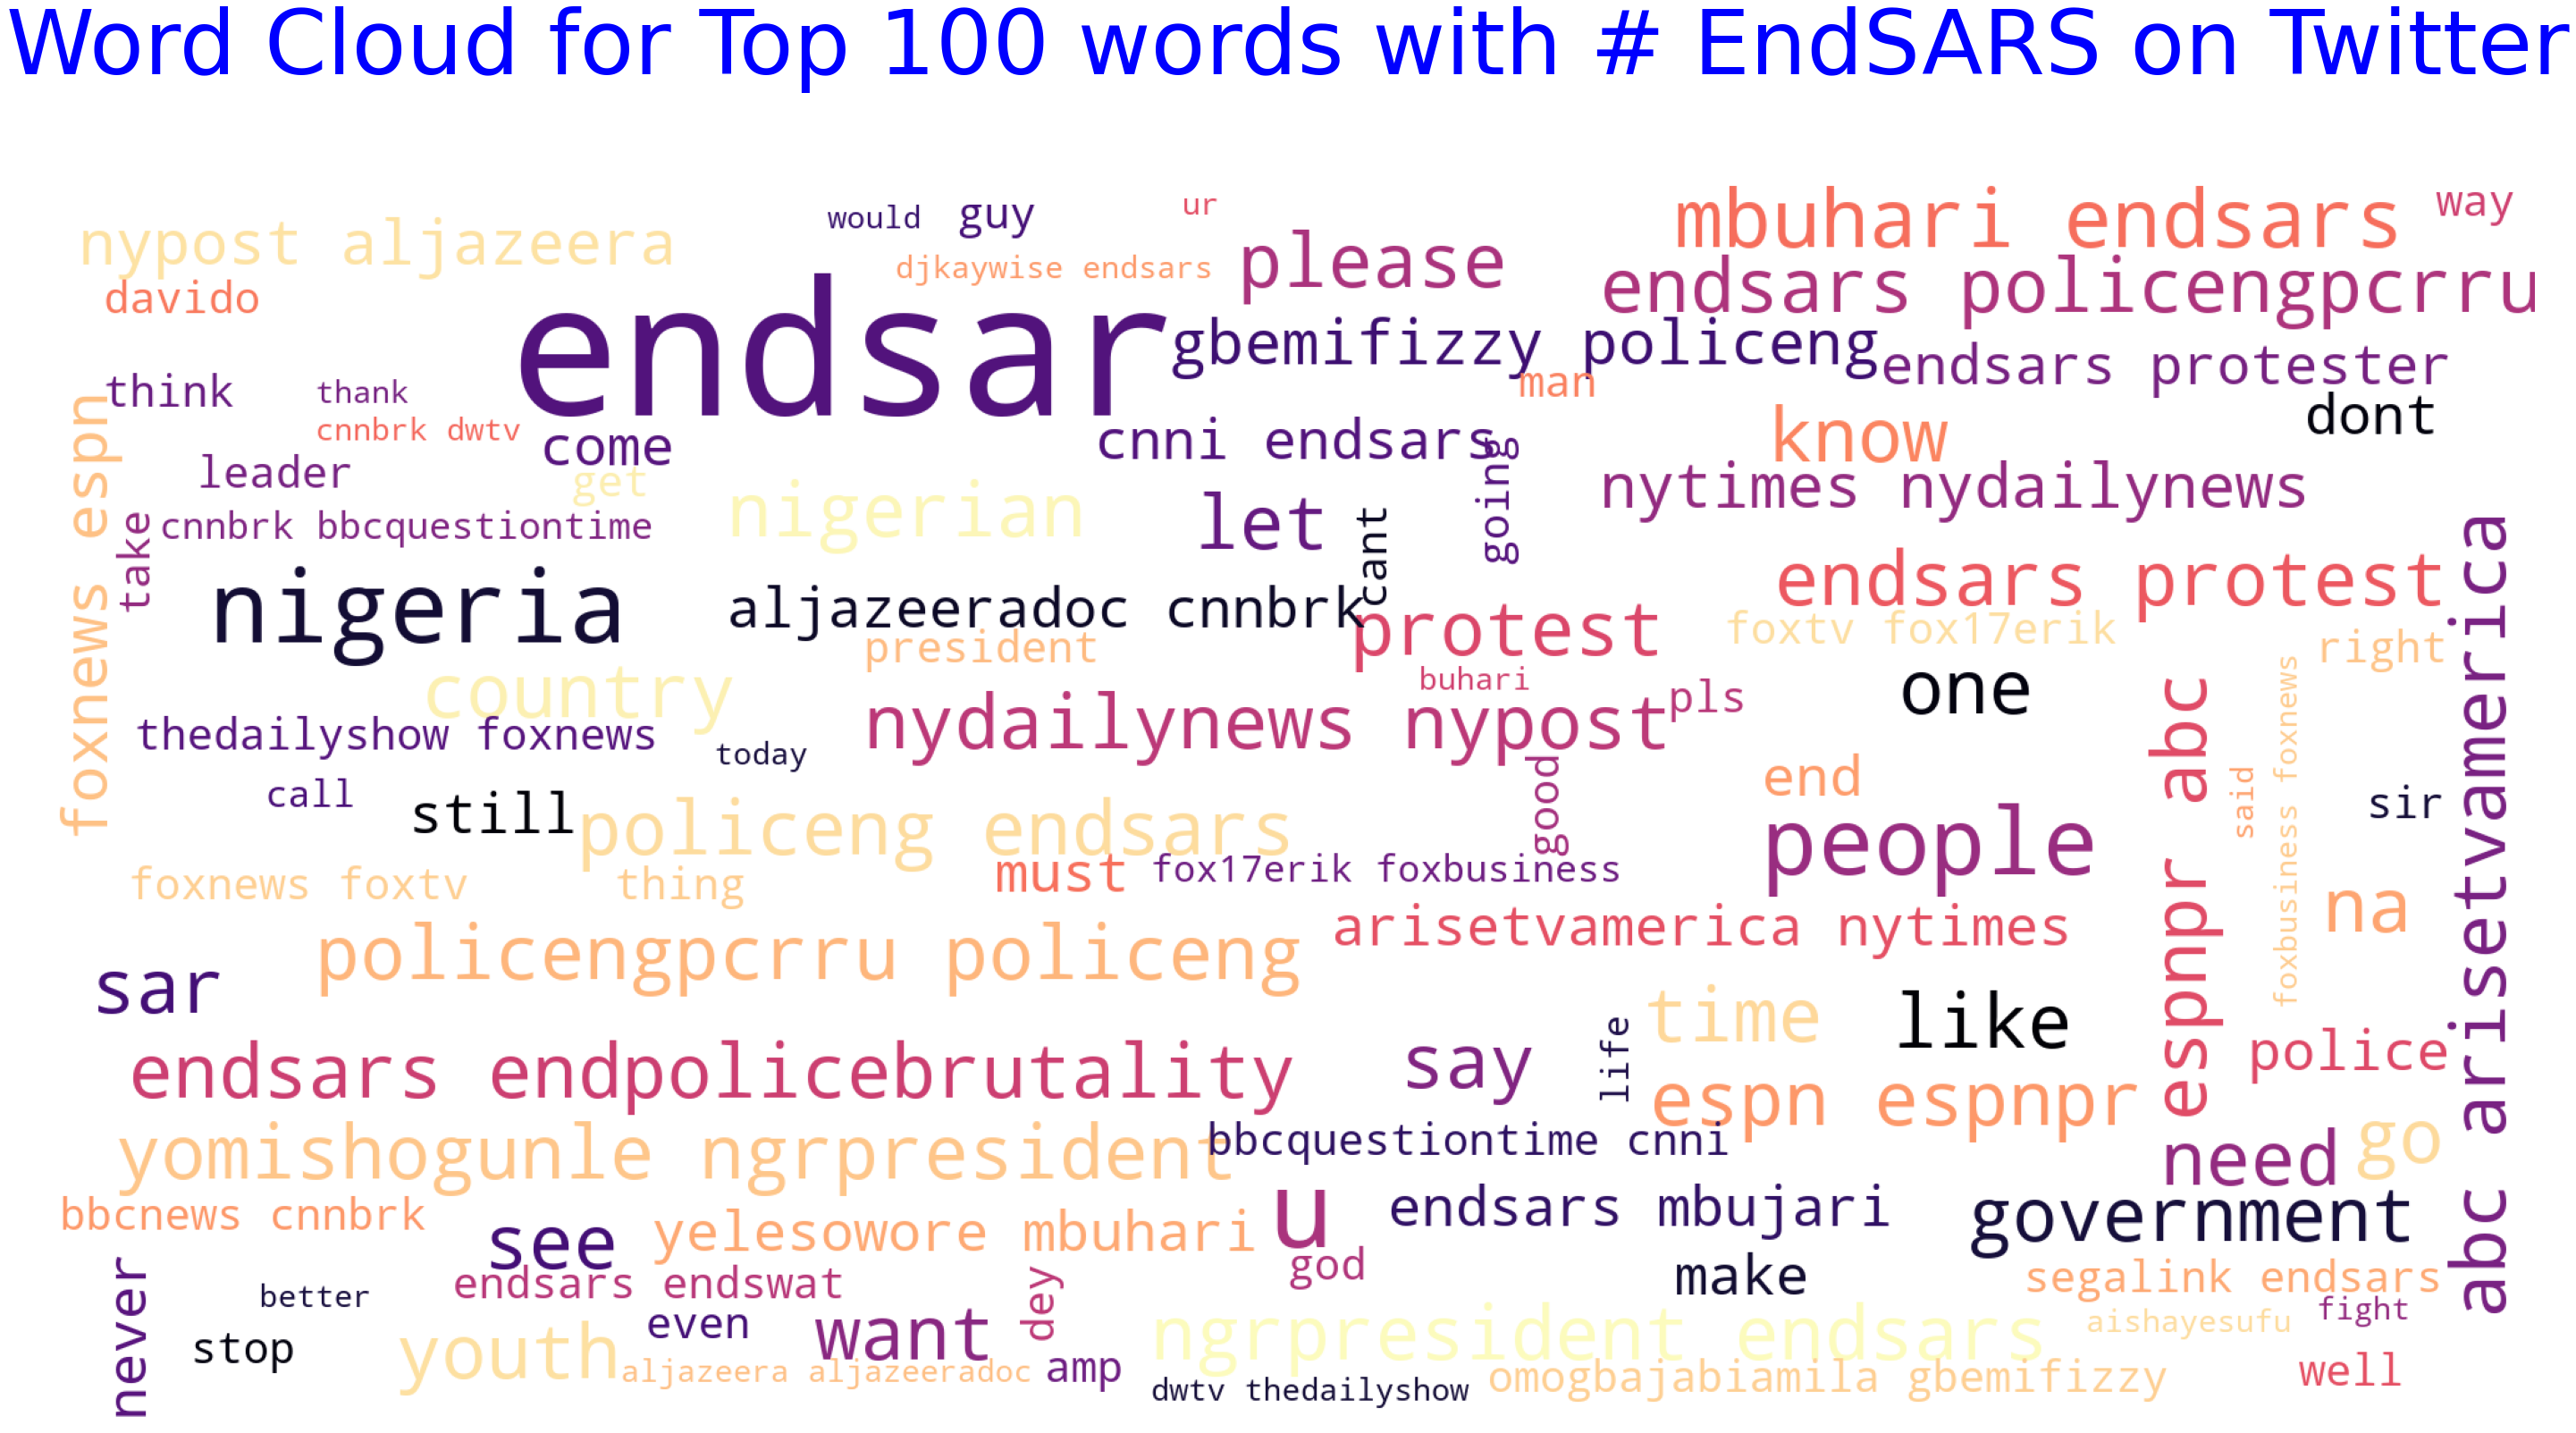

In [59]:
cut_text = " ".join(df.text)
max_words=100
word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(stop_words),
                    max_words=max_words,
                    max_font_size=30,
                    scale=5,
    colormap='magma',
                    random_state=1).generate(cut_text)
fig = plt.figure(1, figsize=(50,50))
plt.axis('off')
plt.title('Word Cloud for Top '+str(max_words)+' words with # EndSARS on Twitter\n', fontsize=100,color='blue')
fig.subplots_adjust(top=2.3)
plt.imshow(word_cloud)
plt.show()

In [60]:
date_df = df[['date']]
date_df['count'] = 1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
df[(df['date']>='2020-10-01') & (df['date']<='2020-10-31')]

,username,date,content,cleaned
1733,4700,2020-10-31,Na Revolution we want this monthendsars,na revolution want month endsars
1734,3750,2020-10-31,Rivers state is on fire Endsarsendbadgovernment,rivers state fire endsarsendbadgovernment
1735,2920,2020-10-31,adekunleGOLD Then after all those useless gove...,adekunlegold useless governors president say s...
1736,1907,2020-10-31,IPOBCommunity NnamdiFans AmnestyNigeria USinNi...,ipobcommunity nnamdifans amnestynigeria usinni...
1737,1907,2020-10-31,AloyEjimakor Ipob is now bearing the burden of...,aloyejimakor ipob bearing burden offence commi...
...,...,...,...,...
8704,5099,2020-10-03,fireboydml EndSARS,fireboydml endsars
8705,336,2020-10-03,Tomorrow Governor Okowa will say he is working...,tomorrow governor okowa say working endsars wo...
8706,1480,2020-10-03,MBuhari Baba Endsars,mbuhari baba endsars
8707,827,2020-10-03,Is this the life you promised usDo enjoy seein...,life promised us enjoy seeing people die alrea...


<AxesSubplot:xlabel='date'>

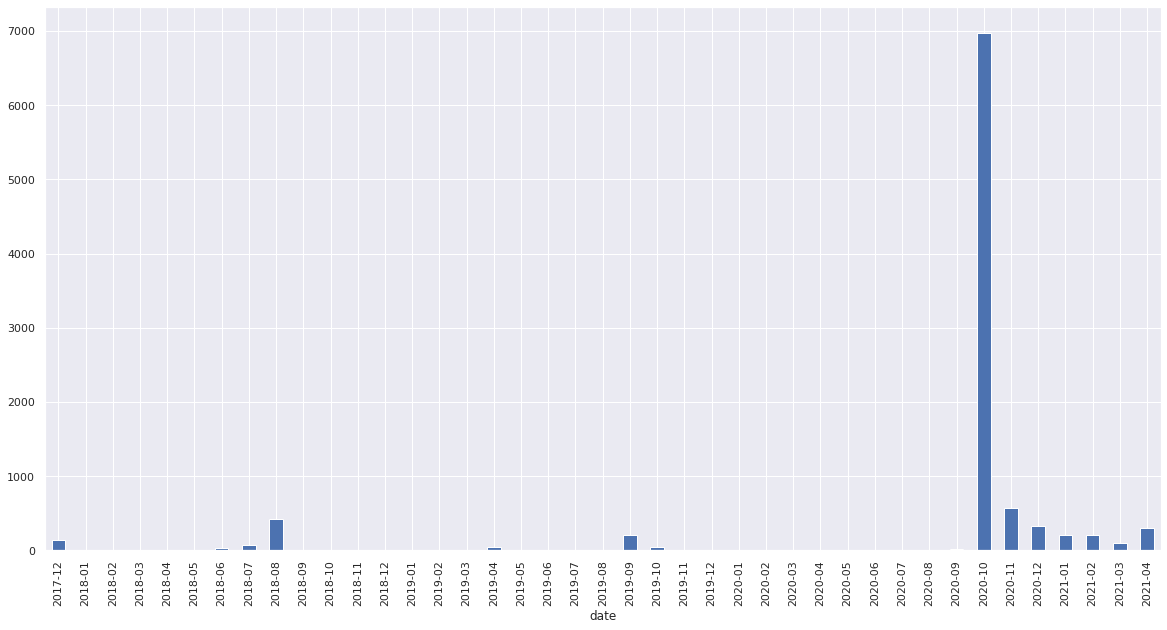

In [62]:
df1 = df.groupby(df['date'].dt.to_period('M'))['content'].count()
df1 = df1.resample('M').asfreq().fillna(0)
df1.plot(kind='bar',figsize=(20,10))

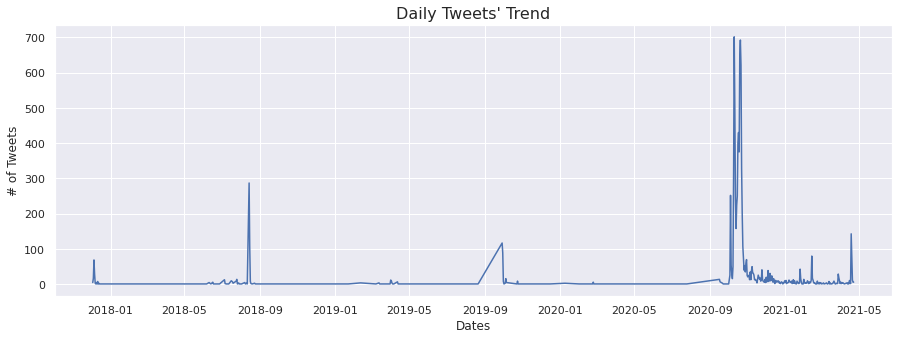

In [63]:
daily_tweets = df.groupby(['date'])['content'].count()

fig = plt.figure(figsize = (15,5))
plt.plot(daily_tweets.index,daily_tweets.values)
plt.title('Daily Tweets\' Trend', fontsize=16)
plt.xlabel('Dates')
plt.ylabel('# of Tweets')
plt.show()

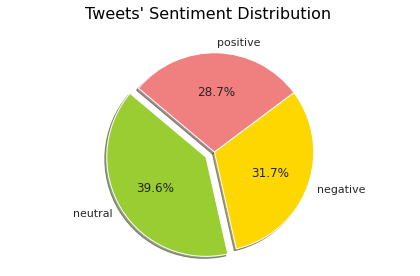

In [64]:
sentiment_dist = data.label.value_counts()

plt.pie(sentiment_dist, labels=sentiment_dist.index, explode= (0.1,0,0),
        colors=['yellowgreen', 'gold', 'lightcoral'],
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Tweets\' Sentiment Distribution \n", fontsize=16, color='Black')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [65]:
sentiment_df['username'] = sentiment_df['username'].astype(str)
# Function to filter top 10 tweets by sentiment
def top10AccountsBySentiment(sentiment):
    df = sentiment_df.query("label==@sentiment")
    top10 = df.groupby(by=["username"])['label'].count().sort_values(ascending=False)[:10]
    return(top10)

### Let's look at the Top 10 accounts by each sentiments


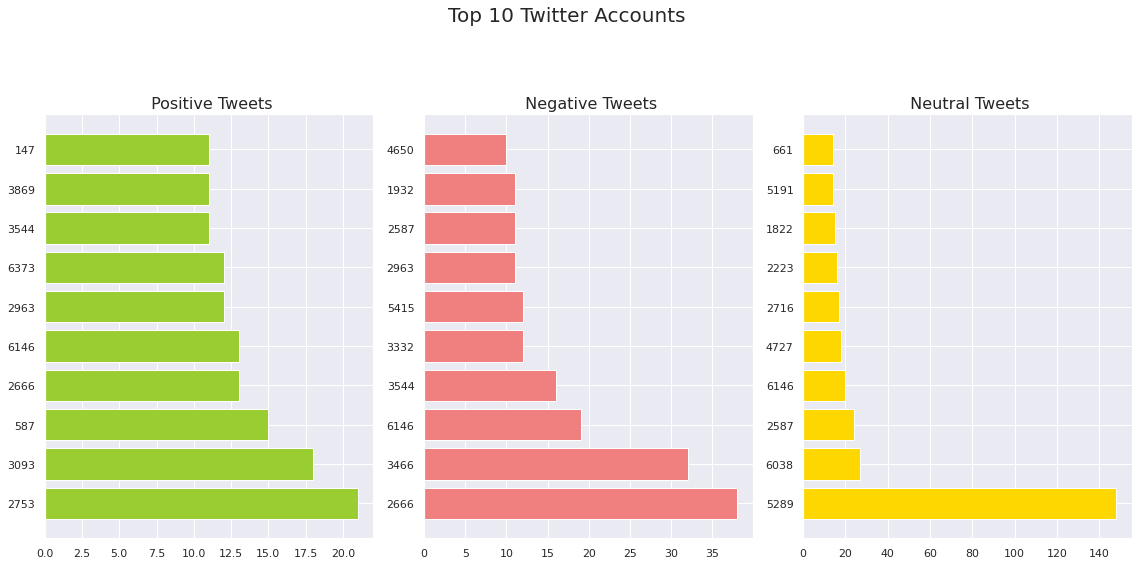

In [66]:
# Top 10 tweets by each sentiment
top10_pos = top10AccountsBySentiment("positive")
top10_neg = top10AccountsBySentiment("negative")
top10_neu = top10AccountsBySentiment("neutral")

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, squeeze=True, figsize=(16,8))
fig.suptitle('Top 10 Twitter Accounts \n', fontsize=20)

ax1.barh(top10_pos.index, top10_pos.values, color='yellowgreen')
ax1.set_title("\n\n Positive Tweets", fontsize=16)

ax2.barh(top10_neg.index, top10_neg.values, color='lightcoral')
ax2.set_title("\n\n Negative Tweets", fontsize=16)

ax3.barh(top10_neu.index, top10_neu.values, color='gold')
ax3.set_title("\n\n Neutral Tweets", fontsize=16);

fig.tight_layout()
fig.show()

### Let's print and go through the tweets - Top 10 tweets by each sentiment based on the polarity scores 

In [67]:
pd.set_option('display.max_colwidth', None)
print('Top 10 positive tweets')
display(sentiment_df[sentiment_df['label']=='positive'].sort_values('compound',ascending=False)[0:10])
print('Top 10 negative tweets')
display(sentiment_df[sentiment_df['label']=='negative'].sort_values('compound')[0:10])
print('Top 10 neutral tweets')
display(sentiment_df[sentiment_df['label']=='neutral'].sort_values('compound')[0:10])

Top 10 positive tweets


,username,date,content,neg,neu,pos,compound,label
3771,3598,2020-10-20,Best service provider of the year AirtelNGCares Best lawyer of the year falzthebahdguy Best artiste of the year davido Best eatery of the year ChickenRepublic Best party of the year OfficialYDPNG Best twitter hash tag of the year Endsars,0.000,0.418,0.582,0.9833,positive
1398,1076,2020-11-13,stevehanke MBuhari Good day Wow I really appreciate your concern towards the well being of our blessed country endsars But at the end all that matters is that we as people helps one another to get to our goals God bless nigeria and Still don’t forget to buy onions 🧅 from me🧅 at best price,0.036,0.431,0.534,0.9766,positive
1295,224,2020-11-20,Its A Month Now endsars codeshifuMay there soul rest in perfect peace Today we express our grief over a great man hero and father Your heroic deeds never die May your soul rest in peace,0.074,0.346,0.580,0.9717,positive
347,5873,2021-03-27,ENDSARS was our only window to freedom but we dont want to die for freedom we rather stay alive in chainsLagos was energized for the birth of a new generational mindsetWe are delibratly silenced but if we refuse to stand down we will winendsarsbot simplyEromz,0.082,0.408,0.510,0.9629,positive
864,3427,2020-12-25,EndSars Amen dear May this season bring to you joy laughter and happiness May be a better year all around Merry Christmas,0.000,0.359,0.641,0.9618,positive
6040,3516,2020-10-15,Freedom Is not given Freedom Is taken Nigerians it Is time to take back our Freedom from a wasted generation lead by an analog great grand father EndBadGovrnment EndSars,0.092,0.344,0.564,0.9552,positive
2657,4756,2020-10-22,A hero is somebody who is selfless Who is generous in spirit Who just tries to give back as much as possible and help people A hero to me is someone who saves people and who really deeply cares djswitch ENDSARS,0.000,0.448,0.552,0.9550,positive
1395,6229,2020-11-14,RIP FLT LT JJ RAWLINGS we Biafrans and even the World if they would be honest to themselves are witnesses to the progress and PEACE that is Ghana today thanks to your LEADERSHIP We URGENTLY NEED the JJ RAWLINGS principle clean up NIGERIA it is filty EndSARS EmekaGift,0.000,0.510,0.490,0.9531,positive
426,5077,2021-02-22,EndSars And she come get better music on top delicious voice join Who no like better thing Wahala for who no like IAmENISA and seronous voice,0.000,0.393,0.607,0.9477,positive
8327,3063,2020-10-08,Great work and great youth of Nigeria may Almighty God in heaven bless you all Amen and Amen EndSarS,0.000,0.328,0.672,0.9468,positive


Top 10 negative tweets


,username,date,content,neg,neu,pos,compound,label
183,1626,2021-04-18,YeleSowore MBuhari EndSars mbujari the inhuman ZariaGenocide by wicked mass murderer tyrant MBuhari IntlCrimCourt men women children pregnant women Shia families wiped out existenceFreeZakzaky BuhariObeyCourtOrder,0.460,0.540,0.000,-0.9810,negative
2630,2666,2020-10-22,NAkufoAddo President Nana Stop covering evil We Africans youths hate lies President buhari is dead You should not support evil EndSars protesters can not accept lies from you Stop stop stop,0.698,0.190,0.112,-0.9794,negative
1728,5136,2020-11-01,renoomokriadeyanjudejiSaharaReportersendsarsjacksonpbnBAD LEADERS CAN NEVER CHANGEBAD LEADERS CAN NEVER CHANGEBAD LEADERS CAN NEVER CHANGEBAD LEADERS CAN NEVER CHANGEBAD LEADERS CAN NEVER CHANGEBAD LEADERS CAN NEVER CHANGEBAD LEADERS CAN NEVER CHANGEretweet,0.476,0.524,0.000,-0.9764,negative
8763,6476,2019-10-23,Rayscode segalink Using iphone is a crimeHaving a laptop is a crimeCelebrating birthday is a crimeFurnishing of house with interior decoration is a crimeBuying of car and lady bike is a crimeHaving dread is a crime Nigeria is sickEndsars,0.581,0.340,0.079,-0.9738,negative
2598,3587,2020-10-22,The good guys who were supposed to stop the bad guys eventually became worse than the bad guys WTFendSARSI mean how can they respond to protest about police brutality with more police brutalityendpolicebrutalityendbadgovernance,0.621,0.310,0.069,-0.9726,negative
2213,2666,2020-10-23,BashirAhmaad MBuhari A Child Crying to Father Im Hungry And The Father Pick Cane Flogged The Child For Complaining Of Hunger to Death Death Is The Only Benefit For One Nigeria and Killing Is The Salary For One Nigeria Father Thanks For Killing The Child EndSars Protesters What A Father Wicked,0.517,0.377,0.106,-0.9716,negative
2210,2666,2020-10-23,dailytrust A Child Crying to Father Im Hungry And The Father Pick Cane Flogged The Child For Complaining Of Hunger to Death Death Is The Only Benefit For One Nigeria and Killing Is The Salary For One Nigeria Father Thanks For Killing The Child EndSars Protesters What A Father Wicked,0.536,0.354,0.110,-0.9716,negative
2214,2666,2020-10-23,JamesDuddridge GeoffreyOnyeama A Child Crying to Father Im Hungry And The Father Pick Cane Flogged The Child For Complaining Of Hunger to Death Death Is The Only Benefit For One Nigeria and Killing Is The Salary For One Nigeria Father Thanks For Killing The Child EndSars Protesters What A Father Wicked,0.527,0.366,0.108,-0.9716,negative
2212,2666,2020-10-23,JamesDuddridge GeoffreyOnyeama UKinNigeria PoliceNG A Child Crying to Father Im Hungry And The Father Pick Cane Flogged The Child For Complaining Of Hunger to Death Death Is The Only Benefit For One Nigeria and Killing Is The Salary For One Nigeria Father Thanks For Killing The Child EndSars Protesters What A Father Wicked,0.499,0.399,0.102,-0.9716,negative
602,3143,2021-02-04,SaharaReporters Dont forget this govt dialogue with Terrorist still dialoguing with Terrorist even yesterday release captured BOKO haram members rehabilitate them arrest peaceful endsars protesters kill Shiite members kill IPOB unarmed members giv FULANI HERDSMEN license to kill n go free,0.456,0.410,0.134,-0.9707,negative


Top 10 neutral tweets


,username,date,content,neg,neu,pos,compound,label
6,2076,2021-04-21,YeleSowore MBuhari EndSars mbujari Mr Spokesman okaree this really shows your level of reasoning and cultured,0.000,1.000,0.000,0.0,neutral
6473,2223,2020-10-13,realDonaldTrump Endsars EndsarsEndsarsEndsarsEndsarsEndsars,0.000,1.000,0.000,0.0,neutral
6475,276,2020-10-13,not only Endsars all the check point in Eastern region of Nigeria must be remove,0.000,1.000,0.000,0.0,neutral
6477,871,2020-10-13,My people Endsars,0.000,1.000,0.000,0.0,neutral
6479,272,2020-10-13,EndSARs,0.000,1.000,0.000,0.0,neutral
6483,6275,2020-10-13,mrmacaronii UN EndSars EndPoliceBrutality,0.000,1.000,0.000,0.0,neutral
6485,1158,2020-10-13,Lets call on Apple MercedesBenz Nike gucci to here our endsars cries and support the movementEndSARS EndPoliceBrutalityinNigeria IGPDissolvesSARS,0.165,0.671,0.165,0.0,neutral
6487,5624,2020-10-13,Those saying end SARS are not yahoo boys Doctors and Medical Scientists are saying endsars too DONJAZZY aprokodoctor,0.000,1.000,0.000,0.0,neutral
6489,1525,2020-10-13,port harcourt Nigeria as we speakEndsars,0.000,1.000,0.000,0.0,neutral
6490,3944,2020-10-13,MBuhari NOIweala use same letters and phone calls to endsars old dawg,0.000,1.000,0.000,0.0,neutral


**Conclusion**<br> 

The EndSARS movement peaked in the month of October but it is clear from the analysis done that the tweets frequency have declined shortly after however, the frequency of tweets is higher now compared to the time before the protest and killing happened.<br> 

The analysis of most common words for October and 20th October 2020 includes the word protesters and killing. The sentiment analysis for the 20th of october had the highest negative labels.<br> 

In 2018 and 2019 there are times with sudden increase of the #EndSARS hashtags possibly triggered by viral cases of police brutality around these time frames. The movement was gaining momentum during these times as well that eventually led to the October nationwide protests.<br> 

In conclusion, as this was a beginers attempt, It will be interesting to explore further and see what more can be done with this dataset and especially  with the performance of the sentiment analysis and accuracy which seems to still be a challenge here even though looking at the top ten tweets for each sentiments seem quite accurate, the work can be improved especially with respect to the neutral sentiments labelling <br> 

The performance of a text classification model is heavily dependent upon the type of words used and type of features created for classification.  I may be useful to work towards re-training pre-existing sentiment algorithm and customise to my specific case which may still be used to improve the results of my analysis in this notebook.
